# Table of Contents <a id='head'></a>

  ### <a href='#data_explore'> Data Exploration</a>

  ### <a href='#h1_feature_diff'> Hypothesis </a>
  <a href='#h1_feature_diff'> Hypothesis 1: There is statistical difference in features for players lasted 5+ Yr </a>
  
  <a href='#h2_feature_imp'> Hypothesis 2: All features have equal importance to the final outcome </a>
  
  <a href='#h3_train_test_diff'> Hypothesis 3: Training and testing data are statistically similar to each other </a>

  ### <a href='#base_model'> Modelling Experiments </a>
  
  <a href='#base_model'> Model Base: All 1s </a>
  
  <a href='#xgb_std'> Model 1: Standard XGBoost Model </a>
  
  <a href='#xgb_resample'> Model 2: XGBoost with resampled data </a>
  
  <a href='#xgb_reduced_features'> Model 3: XGBoost with reduced features </a>

## Data Exploration <a id='data_explore'></a>

In [1]:
import pandas as pd
import numpy as np
import sys

sys.path.append("/home/jovyan/work")

train_data = pd.read_csv('../../data/raw/train.csv')
test_data = pd.read_csv('../../data/raw/test.csv')
print(train_data.shape)
print(test_data.shape)

(8000, 22)
(3799, 21)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_data_x = train_data.copy()
train_data_x = train_data_x.drop(['Id_old', 'Id'], axis=1)
train_data_target = train_data_x.pop('TARGET_5Yrs')

test_data_x = test_data.drop(['Id_old', 'Id'], axis=1)

scaler = StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(train_data_x), columns=train_data_x.columns)
df_test_scaled = pd.DataFrame(scaler.fit_transform(test_data_x), columns=test_data_x.columns)

X_train, X_val, y_train, y_val = train_test_split(df_train_scaled, train_data_target, test_size=0.2, random_state=42)

print(train_data.shape)
print(X_train.shape)
print(X_val.shape)

(8000, 22)
(6400, 19)
(1600, 19)


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 22 columns):
Id_old         8000 non-null int64
Id             8000 non-null int64
GP             8000 non-null int64
MIN            8000 non-null float64
PTS            8000 non-null float64
FGM            8000 non-null float64
FGA            8000 non-null float64
FG%            8000 non-null float64
3P Made        8000 non-null float64
3PA            8000 non-null float64
3P%            8000 non-null float64
FTM            8000 non-null float64
FTA            8000 non-null float64
FT%            8000 non-null float64
OREB           8000 non-null float64
DREB           8000 non-null float64
REB            8000 non-null float64
AST            8000 non-null float64
STL            8000 non-null float64
BLK            8000 non-null float64
TOV            8000 non-null float64
TARGET_5Yrs    8000 non-null int64
dtypes: float64(18), int64(4)
memory usage: 1.3 MB


In [4]:
train_data.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,7798.50000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,3977.447579,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


## Hypothesis 1: There is statistical difference in features for players lasted 5+ Yr. <a id='h1_feature_diff'> </a>
Experiment accepted the hypothesis

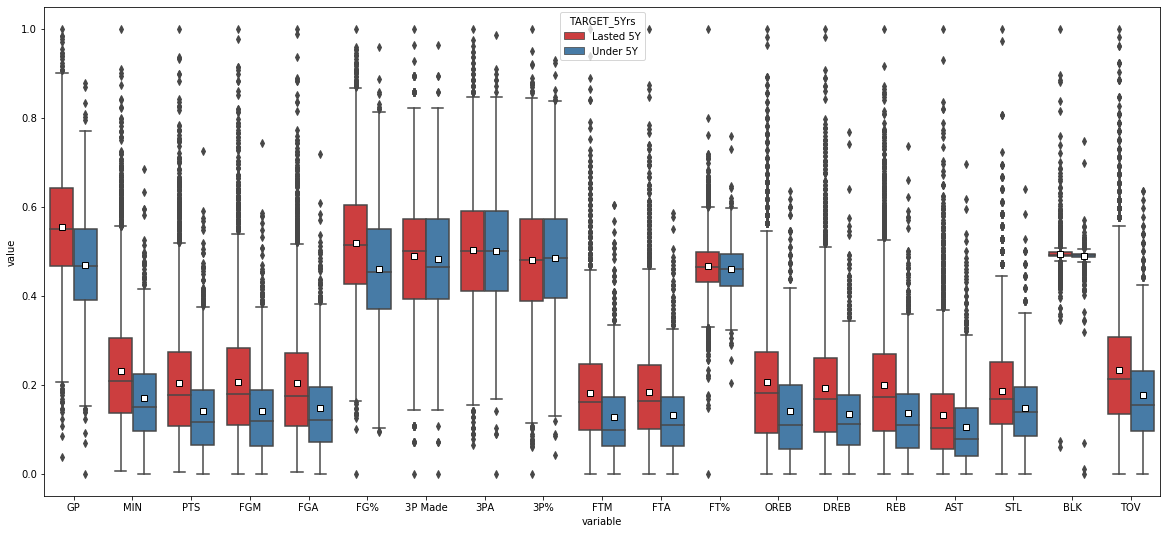

In [5]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

df_train_plot = train_data.copy()
df_train_plot.set_index('Id', inplace=True)

scaler = MinMaxScaler()

df_train_plot = train_data.copy()
df_train_plot_scaled = pd.DataFrame(scaler.fit_transform(df_train_plot), columns=df_train_plot.columns)
df_train_plot_scaled.drop(['Id_old'], axis=1, inplace=True)
df_train_plot_scaled = df_train_plot_scaled.melt(id_vars=['Id', 'TARGET_5Yrs'])
df_train_plot_scaled['TARGET_5Yrs'] = np.where(df_train_plot_scaled['TARGET_5Yrs']==1.0, 'Lasted 5Y', 'Under 5Y')

my_pal = {"Lasted 5Y": "#e42628", "Under 5Y": "#377db6"}

plt.figure(figsize=(20, 9))
sns.axes_style("whitegrid")
ax = sns.boxplot(x='variable', y='value', hue="TARGET_5Yrs", showmeans=True, data=df_train_plot_scaled, palette=my_pal, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.show()

In [6]:
def feature_ttest(feature_name, val1, val2, significance, verbose=0):
    value, pvalue = ttest_ind(val1, val2, equal_var=True)
    if verbose==1: print(value, pvalue)
    if pvalue > significance:
        print(f'Feature {feature_name}\t are likely drawn from the same distributions (fail to reject H0)')
    else:
        print(f'Feature {feature_name}\t are likely drawn from different distributions (reject H0)')

In [7]:
from scipy.stats import ttest_ind

variables = df_train_plot_scaled.variable.unique()

for var in variables:
    features = df_train_plot_scaled[df_train_plot_scaled['variable']==var]
    val5y = features[features['TARGET_5Yrs']=='Lasted 5Y'].value
    valn5y = features[features['TARGET_5Yrs']=='Under 5Y'].value
    feature_ttest(var, val5y, valn5y, 0.05)

Feature GP	 are likely drawn from different distributions (reject H0)
Feature MIN	 are likely drawn from different distributions (reject H0)
Feature PTS	 are likely drawn from different distributions (reject H0)
Feature FGM	 are likely drawn from different distributions (reject H0)
Feature FGA	 are likely drawn from different distributions (reject H0)
Feature FG%	 are likely drawn from different distributions (reject H0)
Feature 3P Made	 are likely drawn from the same distributions (fail to reject H0)
Feature 3PA	 are likely drawn from the same distributions (fail to reject H0)
Feature 3P%	 are likely drawn from the same distributions (fail to reject H0)
Feature FTM	 are likely drawn from different distributions (reject H0)
Feature FTA	 are likely drawn from different distributions (reject H0)
Feature FT%	 are likely drawn from different distributions (reject H0)
Feature OREB	 are likely drawn from different distributions (reject H0)
Feature DREB	 are likely drawn from different distri

## Hypothesis 2: All features have equal importance to the final outcome <a id='h2_feature_imp'></a>
Experiment rejected the hypothesis

In [8]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
 
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature GP: 386.41085518657394
Feature MIN: 199.83967429855517
Feature PTS: 198.42050206768656
Feature FGM: 201.68937590244093
Feature FGA: 153.83271969502712
Feature FG%: 165.3736163960556
Feature 3P Made: 0.31552643050897755
Feature 3PA: 0.08718240662698021
Feature 3P%: 0.32449072493112924
Feature FTM: 191.88459510184902
Feature FTA: 201.70948029088729
Feature FT%: 6.09951579437205
Feature OREB: 194.38377315694242
Feature DREB: 180.69307325003956
Feature REB: 199.151258226559
Feature AST: 48.88219792227974
Feature STL: 94.62715023716459
Feature BLK: 66.02659203044894
Feature TOV: 136.84496034619167


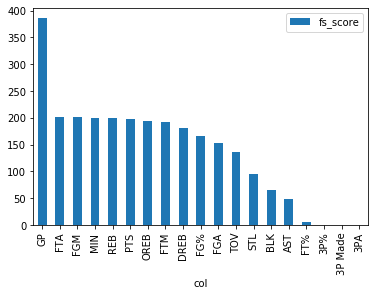

In [9]:
X_train_fs, X_val_fs, fs = select_features(X_train, y_train, X_val)

for i in range(len(fs.scores_)):
    print(f'Feature {X_train.columns[i]}: {fs.scores_[i]}')
feature_plot = pd.DataFrame({'col': X_train.columns, 'fs_score': fs.scores_})
feature_plot = feature_plot.sort_values(by='fs_score', ascending=False)
feature_plot.plot.bar(x='col', y='fs_score')

## Hypothesis 3: Training and testing data are statistically similar to each other <a id='h3_train_test_diff'></a>
Experiment accepted the hypothesis

(11799, 21)


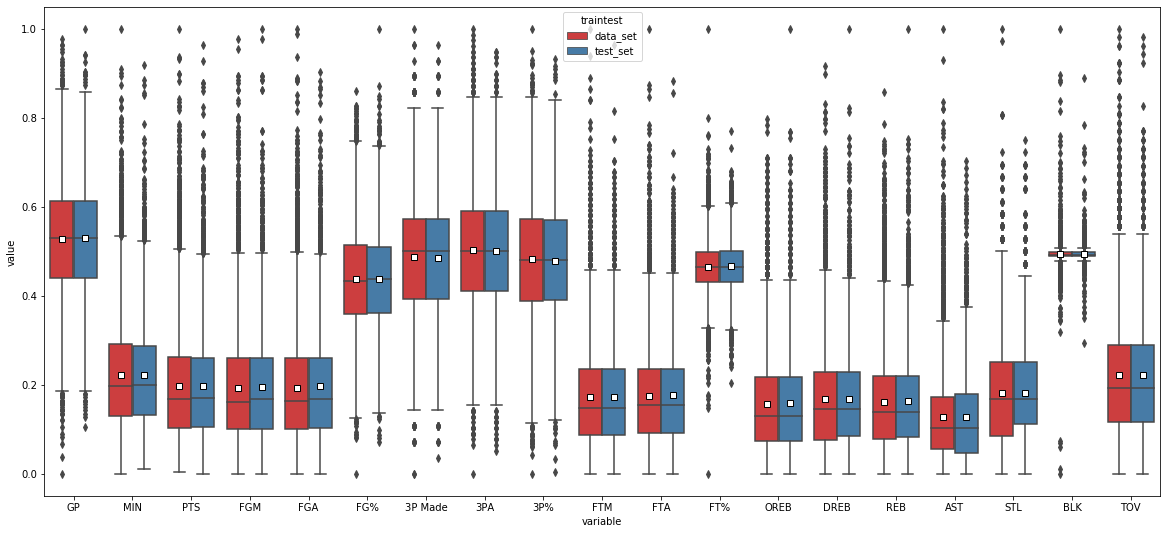

In [10]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

df1train = train_data.copy()
df2test = test_data.copy()

df1train['traintest'] = 0
df2test['traintest'] = 1

full_data = pd.concat([df1train, df2test], axis=0, sort=False)
full_data = full_data.drop(['Id_old', 'TARGET_5Yrs'], axis=1)
print(full_data.shape)

df_train_plot = full_data.copy()
df_train_plot.set_index('Id', inplace=True)

scaler = MinMaxScaler()

df_plot = full_data.copy()
df_plot_scaled = pd.DataFrame(scaler.fit_transform(df_plot), columns=df_plot.columns)
df_plot_scaled = df_plot_scaled.melt(id_vars=['Id', 'traintest'])
df_plot_scaled['traintest'] = np.where(df_plot_scaled['traintest']==0, 'data_set', 'test_set')

my_pal = {"data_set": "#e42628", "test_set": "#377db6"}

plt.figure(figsize=(20, 9))
sns.axes_style("whitegrid")
ax = sns.boxplot(x='variable', y='value', hue="traintest", showmeans=True, data=df_plot_scaled, palette=my_pal, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.show()

In [11]:
variables = df_plot_scaled.variable.unique()

for var in variables:
    features = df_plot_scaled[df_plot_scaled['variable']==var]
    valtrain = features[features['traintest']=='data_set'].value
    valtest = features[features['traintest']=='test_set'].value
    feature_ttest(var, valtrain, valtest, 0.05)

Feature GP	 are likely drawn from the same distributions (fail to reject H0)
Feature MIN	 are likely drawn from the same distributions (fail to reject H0)
Feature PTS	 are likely drawn from the same distributions (fail to reject H0)
Feature FGM	 are likely drawn from the same distributions (fail to reject H0)
Feature FGA	 are likely drawn from the same distributions (fail to reject H0)
Feature FG%	 are likely drawn from the same distributions (fail to reject H0)
Feature 3P Made	 are likely drawn from the same distributions (fail to reject H0)
Feature 3PA	 are likely drawn from the same distributions (fail to reject H0)
Feature 3P%	 are likely drawn from the same distributions (fail to reject H0)
Feature FTM	 are likely drawn from the same distributions (fail to reject H0)
Feature FTA	 are likely drawn from the same distributions (fail to reject H0)
Feature FT%	 are likely drawn from the same distributions (fail to reject H0)
Feature OREB	 are likely drawn from the same distributions (f

## Baseline Model: predict all 1s <a id='base_model'></a>

ROC_AUC Score: 0.5
-----------
Confusion Matrix with thresthold of 0.5:
TN: 0, FP: 263
FN: 0, TP: 1337
1600 out of 1600 or 100% of players are predicted to be 5+ Yrs
-----------
Recall: 1.0
Accuracy: 0.8356
Balanced Accuracy: 0.5
F1: 0.9105
-----------
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.500


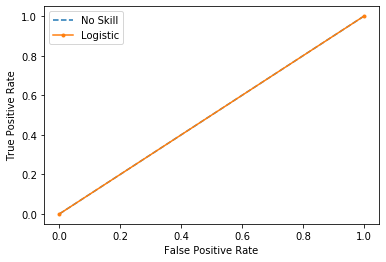

In [12]:
from src.visualization.visualize import eval_metrics

y_pred = np.full(shape=len(y_val), fill_value=1, dtype=np.int)
eval_metrics(y_pred, y_val)

## Model 1: XGBoost (validation auc: 0.70 | submission auc: 0.53) <a id='xgb_std'></a>

ROC_AUC Score: 0.701
-----------
Confusion Matrix with thresthold of 0.5:
TN: 0, FP: 263
FN: 0, TP: 1337
1600 out of 1600 or 100% of players are predicted to be 5+ Yrs
-----------
Recall: 1.0
Accuracy: 0.8356
Balanced Accuracy: 0.5
F1: 0.9105
-----------
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.701


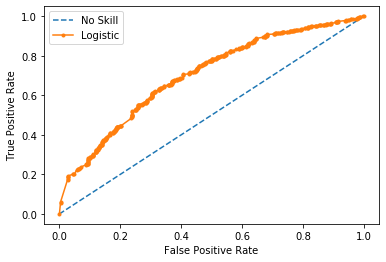

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_val)[:, 1]
eval_metrics(y_pred, y_val)

In [14]:
binary_pred = clf.predict(X_val)
predx = binary_pred
print(f'{np.sum(predx)} out of {len(predx)} or {int(round(np.sum(predx)/len(predx)*100,0))}% of players are predicted to be 5+ Yrs')

1600 out of 1600 or 100% of players are predicted to be 5+ Yrs


In [17]:
from joblib import dump
dump(clf, '../../models/david_xgb_base_70_53.joblib')

submission = clf.predict_proba(test_data_x)[:,1]
submission = pd.DataFrame({'Id':test_data['Id'], 'TARGET_5Yrs':submission})
submission.to_csv("../../data/submission/0206_xgb_base.csv", index=False)

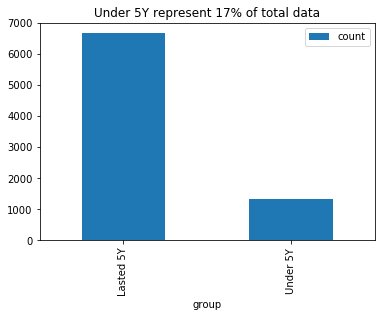

In [18]:
df_train_plot = train_data.copy()
df_train_plot.set_index('Id', inplace=True)
df_train_plot['TARGET_5Yrs'] = np.where(df_train_plot['TARGET_5Yrs']==1.0, 'Lasted 5Y', 'Under 5Y')
df_flag_plot = df_train_plot.groupby(['TARGET_5Yrs']).size()
df_flag_plot = pd.DataFrame({'group':df_flag_plot.index, 'count':df_flag_plot.values})

title_text = "Under 5Y represent " + str(int(np.round(df_flag_plot['count'][1] / np.sum(df_flag_plot['count']) * 100, 0))) + "% of total data"
df_flag_plot.plot.bar(x='group', y='count', title=title_text)

## Model 2: XGB with Re Sampling <a id='xgb_resample'></a>

#### Up Sample (validation auc: 0.71 | submission auc: 0.64)

In [19]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X_train, y_train)
X_val_sm, y_val_sm = sm.fit_resample(X_val, y_val)

print('\nBalance of positive and negative classes (%):')
print(y_sm.value_counts(normalize=True) * 100)
print(y_val_sm.value_counts(normalize=True) * 100)


Balance of positive and negative classes (%):
1    50.0
0    50.0
Name: TARGET_5Yrs, dtype: float64
1    50.0
0    50.0
Name: TARGET_5Yrs, dtype: float64


ROC_AUC Score: 0.712
-----------
Confusion Matrix with thresthold of 0.5:
TN: 935, FP: 402
FN: 527, TP: 810
1212 out of 2674 or 45% of players are predicted to be 5+ Yrs
-----------
Recall: 0.6058
Accuracy: 0.6526
Balanced Accuracy: 0.6526
F1: 0.6355
-----------
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.712


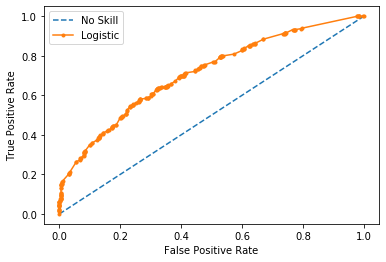

In [20]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=2, random_state=0).fit(X_sm, y_sm)
y_pred = clf.predict_proba(X_val_sm)[:, 1]
eval_metrics(y_pred, y_val_sm)

In [22]:
from joblib import dump
dump(clf, '../../models/david_xgb_upsample_68_64.joblib')

submission = clf.predict_proba(test_data_x)[:,1]
submission = pd.DataFrame({'Id':test_data['Id'], 'TARGET_5Yrs':submission})
submission.to_csv("../../data/submission/0206_xgb_upsample.csv", index=False)

#### Under sample

In [23]:
from imblearn.under_sampling import RandomUnderSampler

us = RandomUnderSampler(random_state=42)

X_us, y_us = us.fit_resample(X_train, y_train)
X_val_us, y_val_us = us.fit_resample(X_val, y_val)

print('\nBalance of positive and negative classes (%):')
print(y_us.value_counts(normalize=True) * 100)
print(y_val_us.value_counts(normalize=True) * 100)


Balance of positive and negative classes (%):
1    50.0
0    50.0
Name: TARGET_5Yrs, dtype: float64
1    50.0
0    50.0
Name: TARGET_5Yrs, dtype: float64


ROC_AUC Score: 0.732
-----------
Confusion Matrix with thresthold of 0.5:
TN: 182, FP: 81
FN: 95, TP: 168
249 out of 526 or 47% of players are predicted to be 5+ Yrs
-----------
Recall: 0.6388
Accuracy: 0.6654
Balanced Accuracy: 0.6654
F1: 0.6562
-----------
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.732


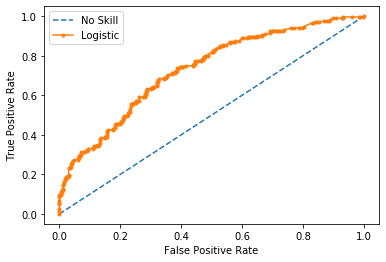

In [24]:
clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=2, max_features=10, random_state=0).fit(X_us, y_us)
y_pred = clf.predict_proba(X_val_us)[:, 1]
eval_metrics(y_pred, y_val_us, praba_threshold=0.5)

In [25]:
submission = clf.predict_proba(test_data_x)[:,1]
submission = pd.DataFrame({'Id':test_data['Id'], 'TARGET_5Yrs':submission})
submission.to_csv("../../data/submission/0208_xgb_downsample.csv", index=False)

## Model 3: XGBoost with reduced features <a id='xgb_reduced_features'></a>
Top 4 validation auc: 0.73 | submission auc: 0.52
Top 9 validation auc: 0.73 | submission auc: 

In [31]:
from sklearn.metrics import roc_auc_score

for i in range(1, len(feature_plot)):
    top_features = feature_plot[0:i].col
    X_smr = X_sm[top_features]you
    X_val_smr = X_val_sm[top_features]

    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=0).fit(X_smr, y_sm)
    y_pred = clf.predict_proba(X_val_smr)[:,1]
    print(f'ROC_AUC Score for top {i} features: \t {round(roc_auc_score(y_val_sm, y_pred),3)}')

ROC_AUC Score for top 1 features: 	 0.818
ROC_AUC Score for top 2 features: 	 0.819
ROC_AUC Score for top 3 features: 	 0.818
ROC_AUC Score for top 4 features: 	 0.816
ROC_AUC Score for top 5 features: 	 0.813
ROC_AUC Score for top 6 features: 	 0.812
ROC_AUC Score for top 7 features: 	 0.866
ROC_AUC Score for top 8 features: 	 0.87
ROC_AUC Score for top 9 features: 	 0.87
ROC_AUC Score for top 10 features: 	 0.862
ROC_AUC Score for top 11 features: 	 0.862
ROC_AUC Score for top 12 features: 	 0.865
ROC_AUC Score for top 13 features: 	 0.883
ROC_AUC Score for top 14 features: 	 0.894
ROC_AUC Score for top 15 features: 	 0.894
ROC_AUC Score for top 16 features: 	 0.893
ROC_AUC Score for top 17 features: 	 0.891
ROC_AUC Score for top 18 features: 	 0.895


In [32]:
# from joblib import dump
# dump(clf, '../models/david_xgb_upsample_68_64.joblib')

top_4_features = feature_plot[0:4].col

X_smr4 = X_sm[top_4_features]
X_val_smr4 = X_val_sm[top_4_features]
test_data_r_4 = test_data_x[top_4_features]

clf4 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=2, random_state=0).fit(X_smr4, y_sm)
y_pred = clf4.predict_proba(X_val_smr4)[:,1]
print(f'ROC_AUC Score for top {4} features: \t {round(roc_auc_score(y_val_sm, y_pred),3)}')

# submission = clf4.predict_proba(test_data_r_4)[:,1]
# submission = pd.DataFrame({'Id':test_data['Id'], 'TARGET_5Yrs':submission})
# submission.to_csv("../data/submission/0206_xgb_top4_features.csv", index=False)

ROC_AUC Score for top 4 features: 	 0.729


In [35]:
top_9_features = feature_plot[0:9].col

X_smr9 = X_sm[top_9_features]
X_val_smr9 = X_val_sm[top_9_features]
test_data_r_9 = test_data_x[top_9_features]

clf9 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=0).fit(X_smr9, y_sm)
y_pred = clf9.predict_proba(X_val_smr9)[:,1]
print(f'ROC_AUC Score for top {9} features: \t {round(roc_auc_score(y_val_sm, y_pred),3)}')

submission = clf9.predict_proba(test_data_r_9)[:,1]
submission = pd.DataFrame({'Id':test_data['Id'], 'TARGET_5Yrs':submission})
submission.to_csv("../../data/submission/0206_xgb_top9_features.csv", index=False)

ROC_AUC Score for top 9 features: 	 0.87


In [34]:
top_9_features = feature_plot[0:9].col

X_smr = X_sm
X_val_smr = X_val_sm
test_data_r = test_data_x

clfall = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=0).fit(X_smr, y_sm)
y_pred = clfall.predict_proba(X_val_smr)[:,1]
print(f'ROC_AUC Score for top {18} features: \t {round(roc_auc_score(y_val_sm, y_pred),3)}')

submission = clfall.predict_proba(test_data_r)[:,1]
submission = pd.DataFrame({'Id':test_data['Id'], 'TARGET_5Yrs':submission})
submission.to_csv("../../data/submission/0206_xgb_all_features.csv", index=False)

ROC_AUC Score for top 18 features: 	 0.892


In [3]:
# correlation between test harness and ideal test condition
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
 
# create the dataset
def get_dataset(n_samples=100):
	X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = list()
	models.append(LogisticRegression())
	models.append(RidgeClassifier())
	models.append(SGDClassifier())
# 	models.append(PassiveAggressiveClassifier())
# 	models.append(KNeighborsClassifier())
# 	models.append(DecisionTreeClassifier())
# 	models.append(ExtraTreeClassifier())
# 	models.append(LinearSVC())
# 	models.append(SVC())
# 	models.append(GaussianNB())
# 	models.append(AdaBoostClassifier())
# 	models.append(BaggingClassifier())
# 	models.append(RandomForestClassifier())
# 	models.append(ExtraTreesClassifier())
# 	models.append(GaussianProcessClassifier())
# 	models.append(GradientBoostingClassifier())
# 	models.append(LinearDiscriminantAnalysis())
# 	models.append(QuadraticDiscriminantAnalysis())
	return models
 
# evaluate the model using a given test condition
def evaluate_model(cv, model):
	# get the dataset
	X, y = X_train, y_train
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores)

In [4]:
# define test conditions
ideal_cv = LeaveOneOut()
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# get the list of models to consider
models = get_models()
# collect results
ideal_results, cv_results = list(), list()

In [5]:
for model in models:
	# evaluate model using each test condition
    print('X')
	cv_mean = evaluate_model(cv, model)
	ideal_mean = evaluate_model(ideal_cv, model)
	# check for invalid results
	if isnan(cv_mean) or isnan(ideal_mean):
		continue
	# store results
	cv_results.append(cv_mean)
	ideal_results.append(ideal_mean)
	# summarize progress
	print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))

TabError: inconsistent use of tabs and spaces in indentation (<ipython-input-5-d17347bb3ff3>, line 4)

In [ ]:
# calculate the correlation between each test condition
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)
# scatter plot of results
pyplot.scatter(cv_results, ideal_results)
# plot the line of best fit
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')
# label the plot
pyplot.title('10-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (10-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')
# show the plot
pyplot.show()